# Breast Cancer Prediction Using Machine Learning

This project aims to build and evaluate machine learning models to classify breast cancer as malignant or benign using a dataset from kaggle.

We'll go through:
- Data cleaning
- Feature selection
- Model training (Logistic Regression, Random Forest, etc.)
- Evaluation and comparison

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

## Load and Explore data

In [2]:
df = pd.read_csv('breast_cancer_data.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Data Cleaning

In [3]:
df =df.drop('Unnamed: 32',axis =1)
df = df.drop('id',axis = 1)
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


## Exploratory Data Analysis (EDA) + Feature Selection

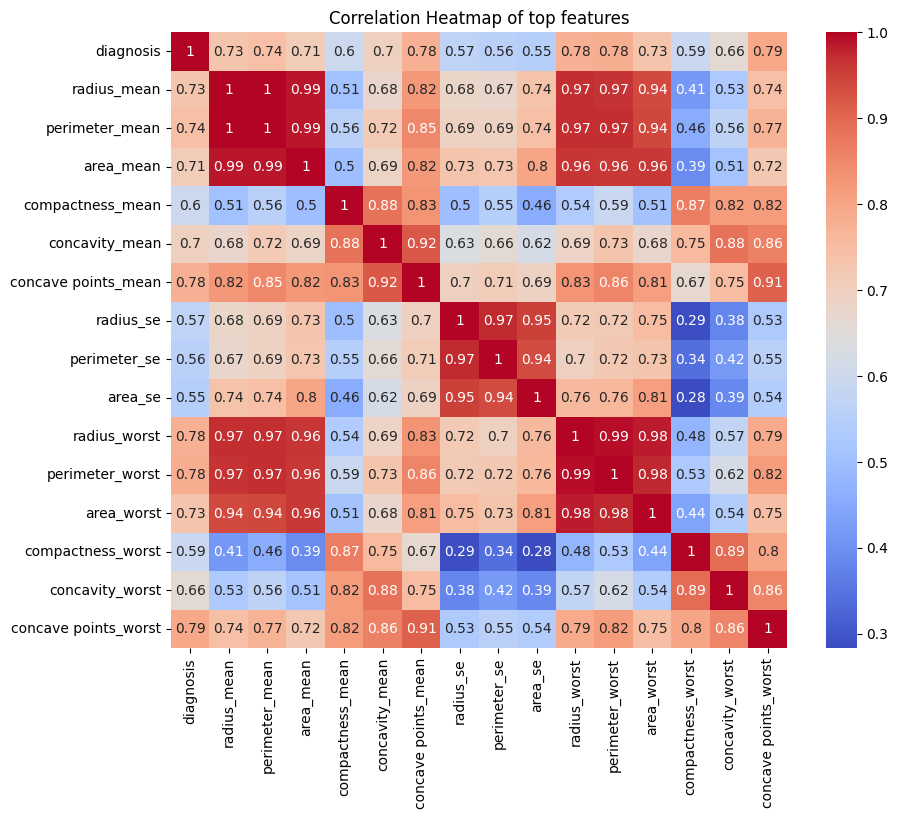

In [4]:
corr_target = df.corr()['diagnosis'].abs()
top_features = corr_target[corr_target > 0.5].index
correlation_matrix = df[top_features].corr()
X = df[top_features.drop('diagnosis')]  # Drop target from features
y = df['diagnosis']

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of top features')
plt.show()


## Train-Test Split 

In [5]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

## Selecting and training the model

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

--- Decision Tree ---
Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

--- Random Forest ---
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy            

In [7]:
print("Actual:" ,y_test.values[:10])
print("Predicted: ",y_pred[:10])      

Actual: [0 1 1 0 0 1 1 1 0 0]
Predicted:  [0 1 1 0 0 1 1 1 0 0]


## Confusion Matrix + ROC Curve(For Best Model)

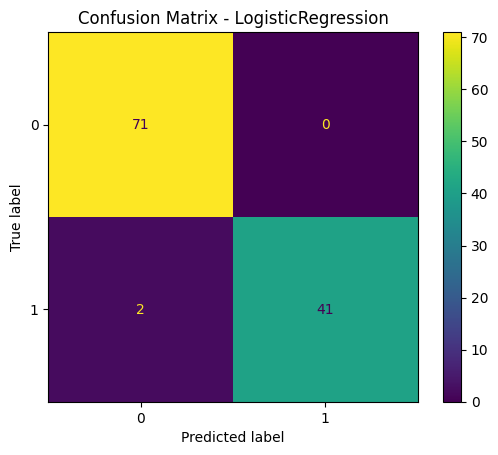

AUC Score: 0.9996724533245988


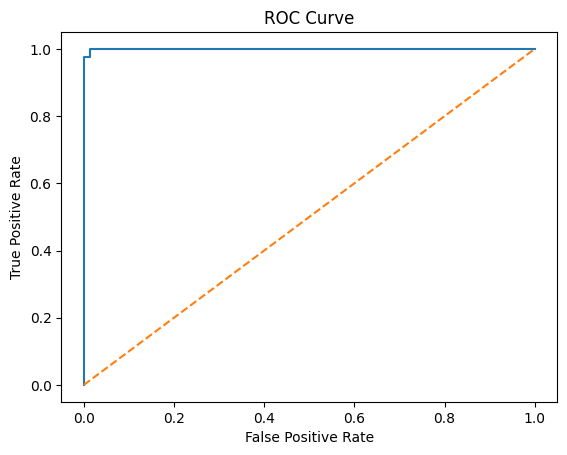

In [8]:
best_model = LogisticRegression(max_iter = 3000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix - LogisticRegression")
plt.show()

# ROC curve
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='LogisticRegression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
print("AUC Score:", roc_auc_score(y_test, y_probs))

## Saving the model

In [10]:
import joblib
joblib.dump(best_model, "breast_cancer_model.pkl")

['breast_cancer_model.pkl']

## Conclusion

- Logistic Regression achieved the highest accuracy of 98.2%.
- All models performed well, but logistic regression gave balanced results with high precision and recall.
- The dataset is relatively balanced, and the models generalized well to unseen data.
